# Lab 4 - part2
### Edge Detection

https://github.com/scikit-image/scikit-image/blob/master/skimage/filters/edges.py

http://scikit-image.org/docs/0.11.x/auto_examples/plot_edge_filter.html

http://scikit-image.org/docs/dev/auto_examples/edges/plot_canny.html



In [1]:
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2
import numpy as np
import skimage.io as io
from skimage.color import rgb2gray
from skimage.filters import roberts, sobel, sobel_h, sobel_v, prewitt
from skimage.feature import canny
from skimage.util.shape import view_as_windows
from skimage.filters import gaussian

In [2]:
'''
1. Built-in Sobel, Prewill, Roberts, Canny
2. Custom Sobel (V-H-Both)
3. Custom LoG
'''

'\n1. Built-in Sobel, Prewill, Roberts, Canny\n2. Custom Sobel (V-H-Both)\n3. Custom LoG\n'

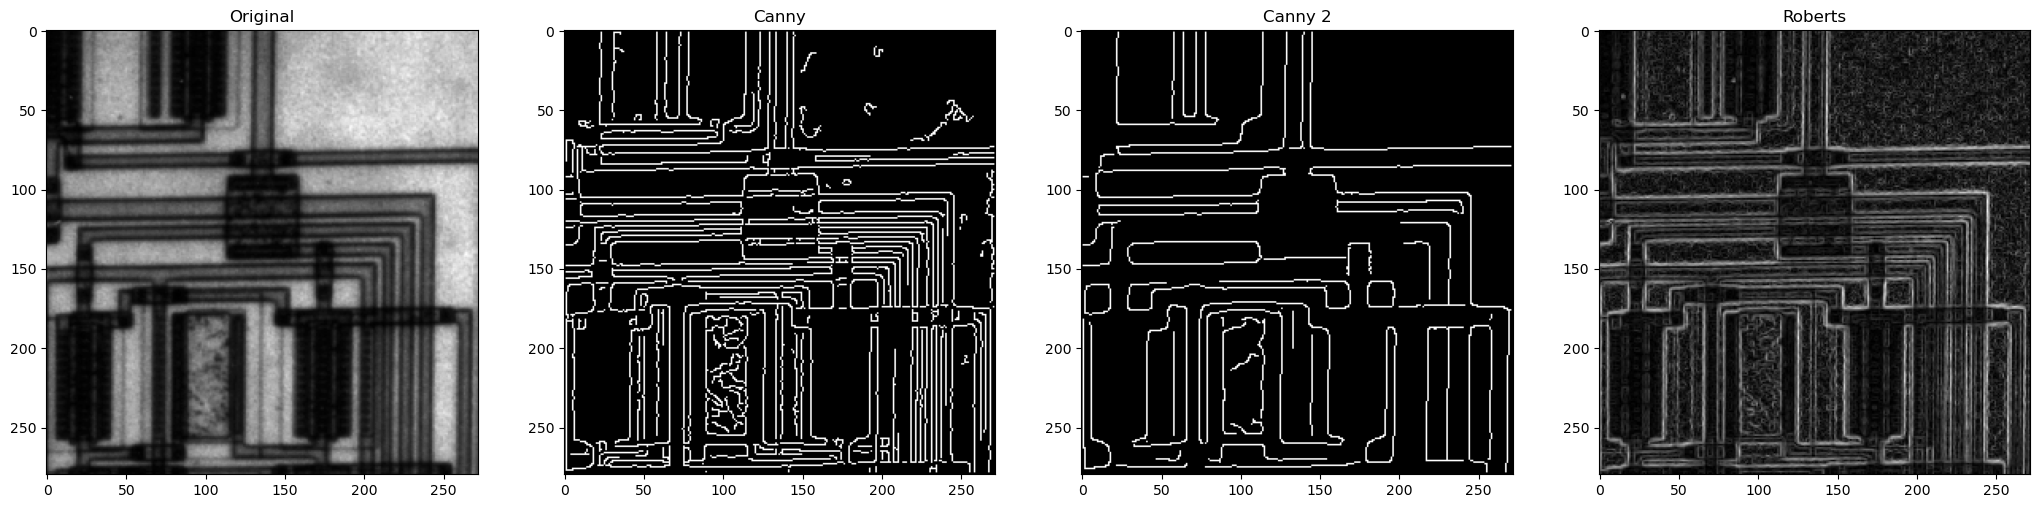

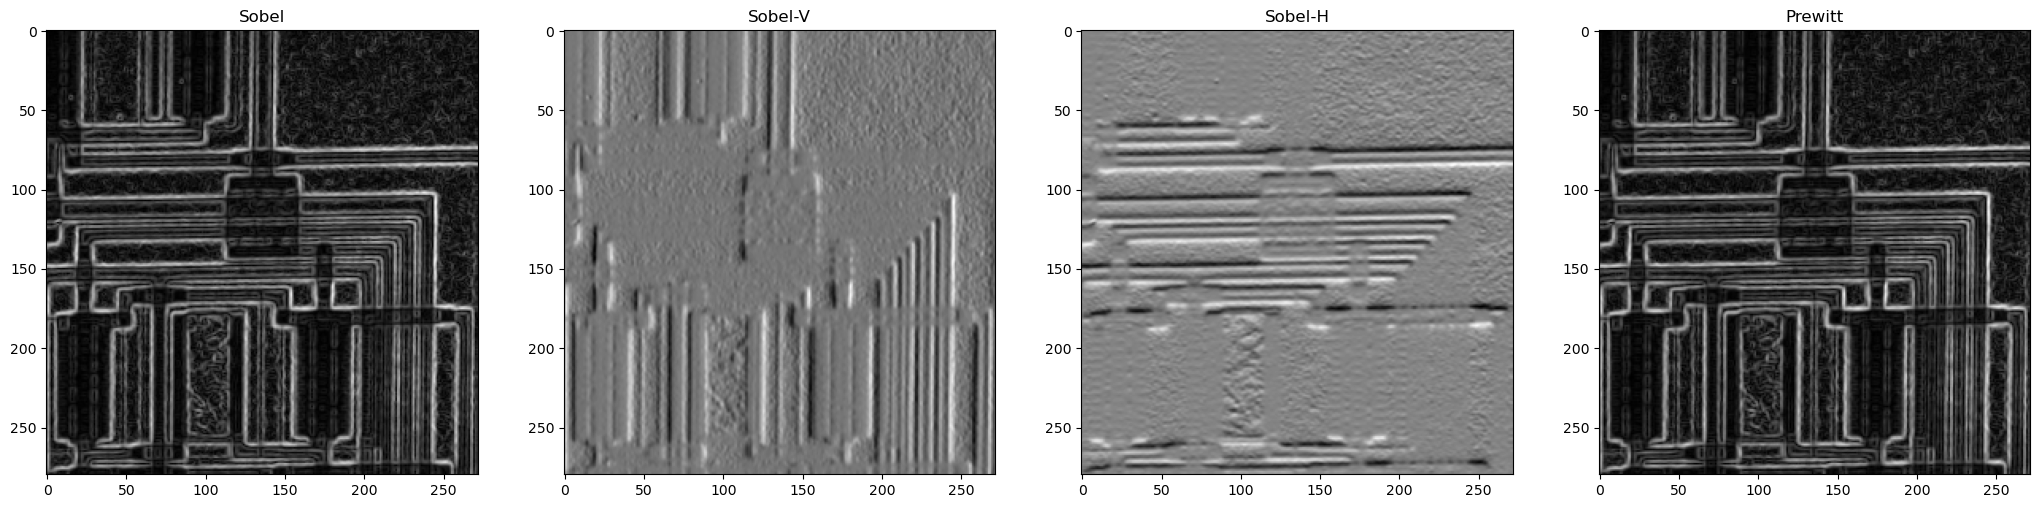

In [3]:
# 1. Built-in Sobel, Prewill, Roberts, Canny

# img = rgb2gray(io.imread('circuit.tif'))
img = io.imread('circuit.tif')

edge_canny = canny(img)
edge_canny_2 = canny(img, sigma=2)
edge_roberts = roberts(img)
edge_sobel = sobel(img)
edge_sobel_v = sobel_v(img)
edge_sobel_h = sobel_h(img)
edge_prewitt = prewitt(img)

show_images([img, edge_canny, edge_canny_2, edge_roberts], ['Original', 'Canny', 'Canny 2', 'Roberts'])
show_images([edge_sobel, edge_sobel_v, edge_sobel_h, edge_prewitt], ["Sobel", "Sobel-V", "Sobel-H", "Prewitt"])

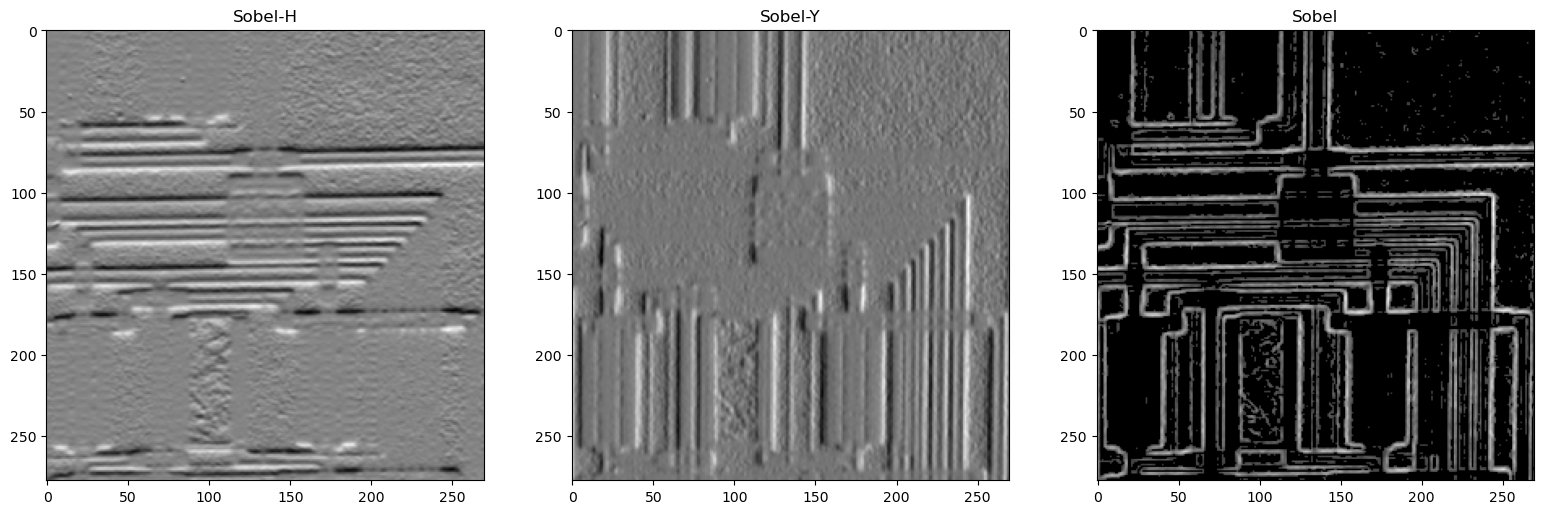

In [4]:
# 2. Custom Sobel (V-H-Both)

img = io.imread('circuit.tif')

hx = [
    [-1,-2,-1],
    [0 ,0 , 0],
    [1 ,2 , 1]
]

hy = [
    [-1,0,1],
    [-2,0,2],
    [-1,0,1]
]

w,h = img.shape

sub_matrices = view_as_windows(img, (3,3), 1)
x_convoluted = np.einsum('ij,klij->kl', hx, sub_matrices)
y_convoluted = np.einsum('ij,klij->kl', hy, sub_matrices)

x2_y2 = x_convoluted**2 + y_convoluted**2
x2_y2_sqrt = np.sqrt(x2_y2)
x2_y2_sqrt[x2_y2_sqrt < 75] = 0

show_images([x_convoluted, y_convoluted, x2_y2_sqrt], ['Sobel-H', 'Sobel-Y', 'Sobel'])

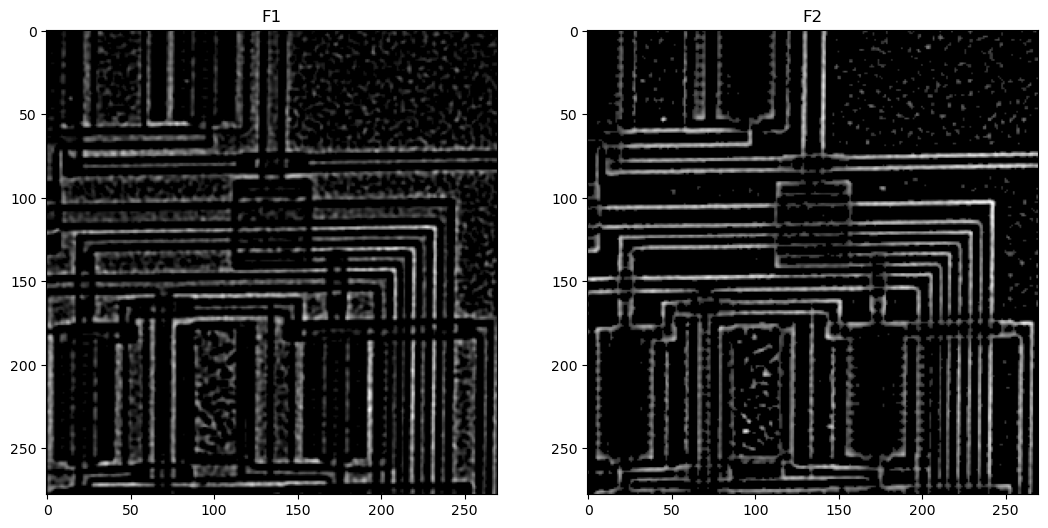

In [5]:
# 3. Custom LoG
thres= 20

img = io.imread('circuit.tif')

f1 = [
    [-1,-1,-1],
    [-1,8,-1],
    [-1,-1,-1]
]

f2 = [
    [0,1,0],
    [1,-4,1],
    [0,1,0]
]

img = gaussian(img, sigma = 1.2)

sub_matrices = view_as_windows(img, (3,3), 1)
f1_convoluted = np.einsum('ij,klij->kl', f1, sub_matrices)
f2_convoluted = np.einsum('ij,klij->kl', f2, sub_matrices)
f1_convoluted[f1_convoluted < 0.01] = 0
f2_convoluted[f2_convoluted < 0.01] = 0

show_images([f1_convoluted, f2_convoluted], ['F1', 'F2'])


In [ ]:
'''
Optional
1-Make edge detection
2-Multiply by factor < 1
3-Subtract (Orginal Image) - (Edge Detection Image)
'''